In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.12/site-packages/mapclassify/classifiers.py:1760: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


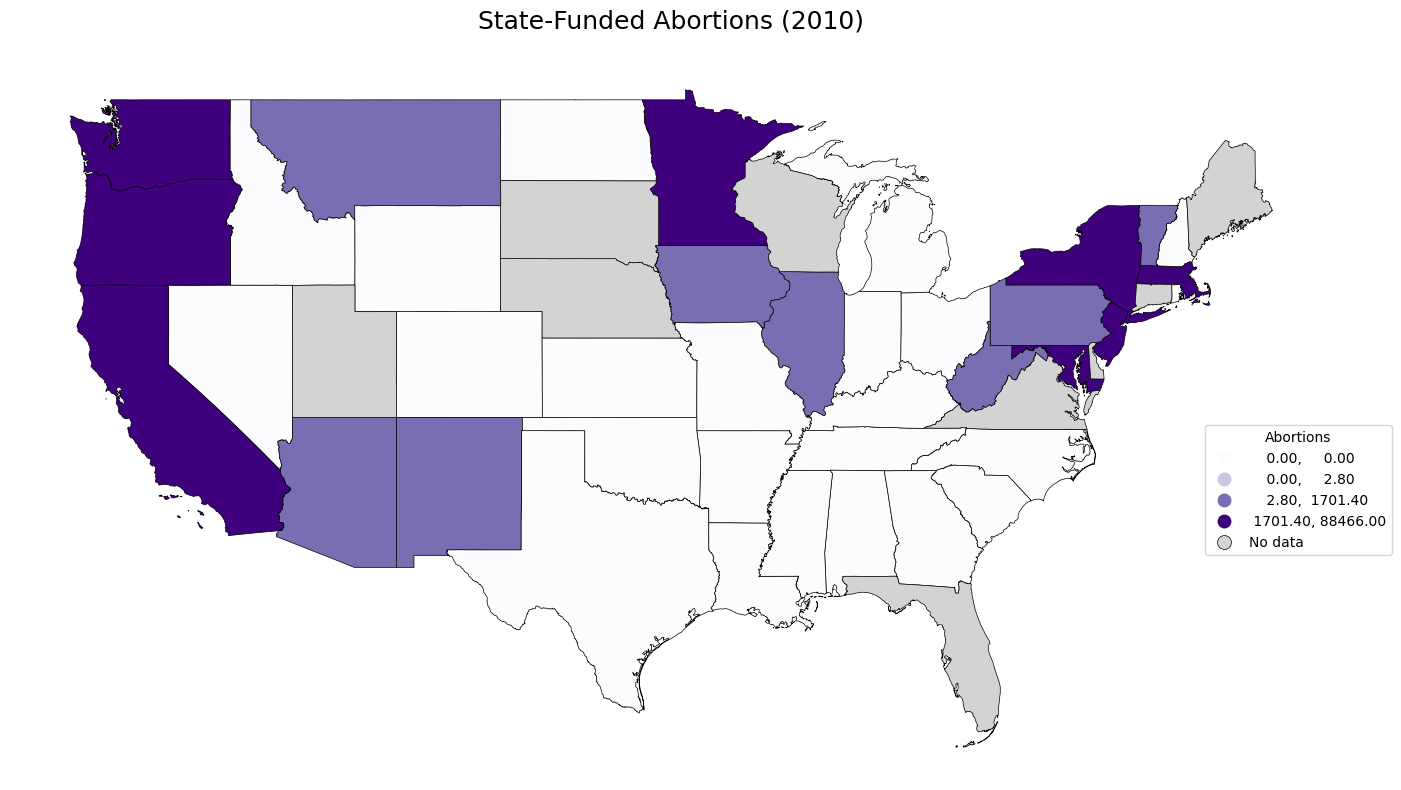

In [37]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your cleaned dataset
raw = pd.read_csv("data/abortion_data.csv")

# 1.2 rename/clean
abortion_df = raw.rename(columns={
    'U.S. State': 'state',
    '% change in abortion rate, 2017-2020': 'pct_change_abortion_rate_17_20',
    '% change in the no. of abortion clinics, 2017-2020': 'pct_change_clinics_17_20',
    '% change in the no. of abortion providers, 2014-2017': 'pct_change_providers_14_17',
    '% of all U.S. abortions, by state of occurrence, 2020': 'pct_us_abortions_2020',
    '% of counties without a known abortion provider, 2014': 'pct_counties_no_provider_2014',
    '% of counties without a known clinic, 2020': 'pct_counties_no_clinic_2020',
    '% of residents obtaining abortions who traveled out of state for care, 2020': 'pct_traveled_out_2020',
    '% of women aged 15-44 living in a county without a clinic, 2020': 'pct_women_no_clinic_2020',
    '% of women aged 15-44 living in a county without an abortion provider, 2014': 'pct_women_no_provider_2014',
    'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017': 'rate_15_17_per_1k_2017',
    'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017': 'rate_15_19_per_1k_2017',
    'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017': 'rate_18_19_per_1k_2017',
    'Change in the no. of abortion clinics, 2017-2020': 'change_clinics_17_20',
    'Change in the no. of abortion providers, 2014-2017': 'change_providers_14_17',
    'No. of abortion clinics, 2020': 'num_clinics_2020',
    'No. of abortion providers, 2017': 'num_providers_2017',
    'No. of abortions among women aged 15-17, by state of residence, 2017': 'abortions_15_17_2017',
    'No. of abortions among women aged 15-19, by state of residence, 2017': 'abortions_15_19_2017',
    'No. of abortions among women aged 18-19, by state of residence, 2017': 'abortions_18_19_2017',
    'No. of abortions among women younger than 15, by state of residence, 2017': 'abortions_under_15_2017',
    'No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020': 'rate_per_1k_occurrence_2020',
    'No. of abortions per 1,000 women aged 15–44, by state of residence, 2020': 'rate_per_1k_residence_2020',
    'No. of abortions, by state of occurrence, 2020': 'abortions_occurrence_2020',
    'No. of abortions, by state of residence, 2020': 'abortions_residence_2020',
    'No. of federally funded abortions, 2010': 'fed_funded_abortions_2010',
    'No. of state funded abortions, 2010': 'state_funded_abortions_2010',
    'Reported public expenditures for abortions (in 000s of dollars), federal, 2015': 'fed_expenditures_000s_2015',
    'Reported public expenditures for abortions (in 000s of dollars), state, 2015': 'state_expenditures_000s_2015',
    'Total no. of publicly funded abortions , 2010': 'total_pub_funded_abortions_2010',
    'Total reported public expenditures for abortions (in 000s of dollars), 2015': 'total_expenditures_000s_2015'
})


# 2. Load U.S. state geometries
gdf = gpd.read_file(
    "https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json"
)[['NAME', 'geometry']].rename(columns={'NAME': 'state'})

# 2.1 Normalize state names to match
abortion_df['state'] = abortion_df['state'].str.strip()
gdf['state'] = gdf['state'].str.strip()

# 2.2 Optional: drop Puerto Rico early
gdf = gdf[~gdf['state'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

# 3. Merge datasets
merged = gdf.merge(abortion_df, on='state', how='left')

# 4. Clean target column
merged['state_funded_abortions_2010'] = pd.to_numeric(
    merged['state_funded_abortions_2010']
    .astype(str)
    .str.replace(',', '', regex=False),
    errors='coerce'
)

# 5. Plot
fig, ax = plt.subplots(figsize=(14, 8))
merged.plot(
    column='state_funded_abortions_2010',
    cmap='Purples',
    scheme='quantiles',
    k=5,
    legend=True,
    edgecolor='black',     # black outlines
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No data"},
    ax=ax
)

ax.set_title("State-Funded Abortions (2010)", fontsize=18, pad=20)
ax.axis('off')
ax.set_aspect('auto')

# Adjust legend position
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((1.05, 0.5))
    leg.set_title("Abortions", prop={'size': 10})

plt.tight_layout()
plt.show()


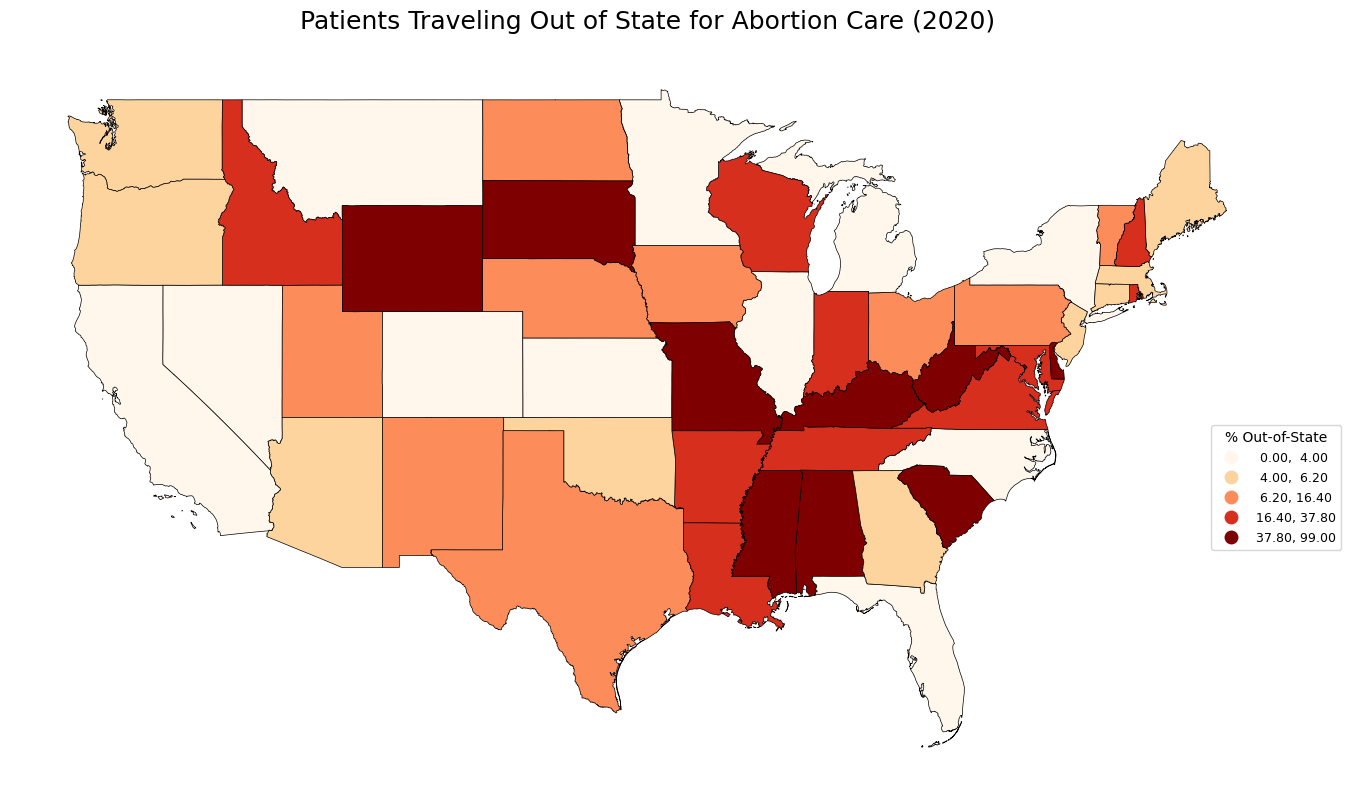

In [16]:
# 1. Clean the target column (if necessary)
merged['pct_traveled_out_2020'] = pd.to_numeric(
    merged['pct_traveled_out_2020']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '', regex=False),
    errors='coerce'
)

# 2. Plot
fig, ax = plt.subplots(figsize=(13.5, 8))
merged.plot(
    column='pct_traveled_out_2020',
    cmap='OrRd',
    scheme='quantiles',
    k=5,
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No data"},
    ax=ax
)

# 3. Formatting
ax.set_title("Patients Traveling Out of State for Abortion Care (2020)", fontsize=18, pad=20)
ax.axis('off')
ax.set_aspect('auto')

# 4. Adjust legend
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((1.05, 0.5))
    leg.set_title("% Out-of-State", prop={'size': 10})
    for t in leg.get_texts():
        t.set_fontsize(9)

plt.tight_layout()
plt.show()


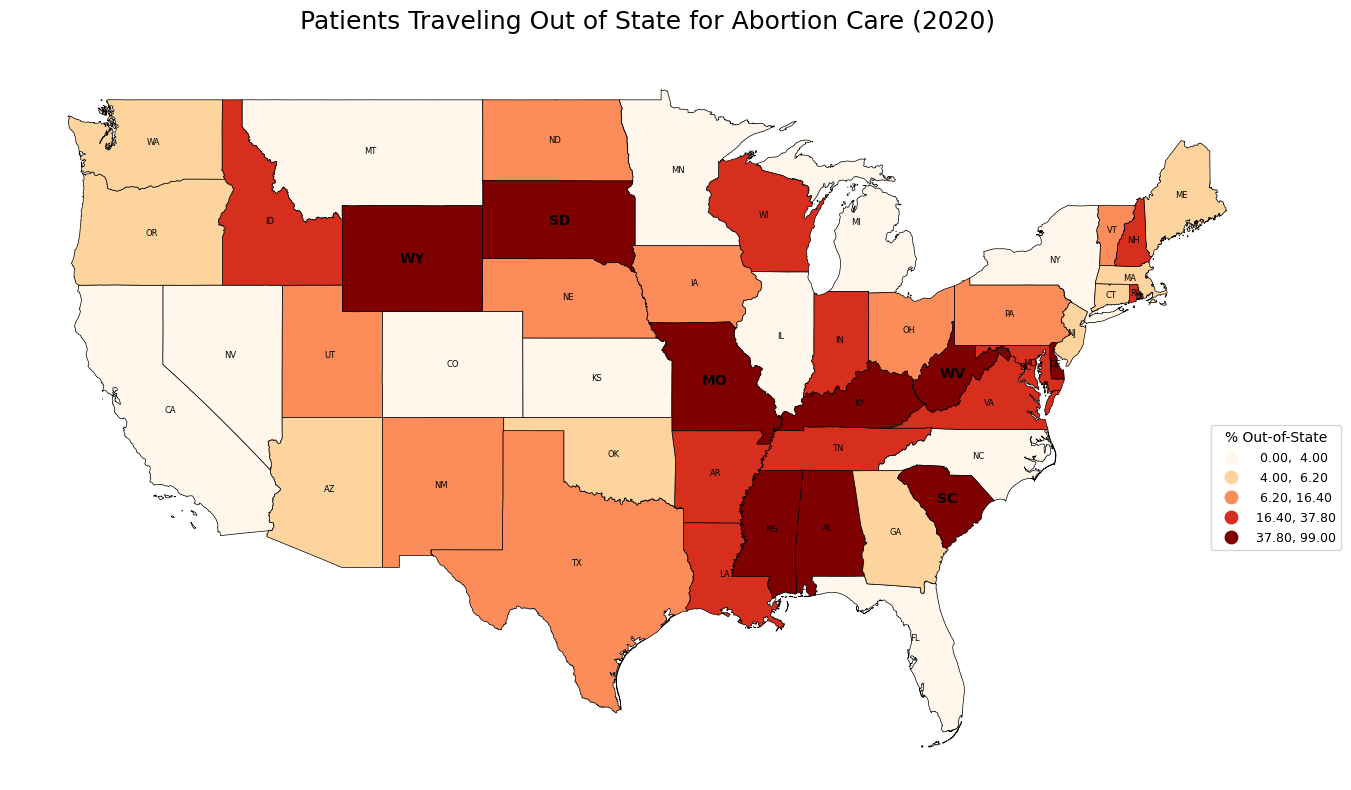

In [15]:
# State abbreviation lookup
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add abbreviations column
merged['abbr'] = merged['state'].map(state_abbr)

# Clean column
merged['pct_traveled_out_2020'] = pd.to_numeric(
    merged['pct_traveled_out_2020']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '', regex=False),
    errors='coerce'
)

# Get top 5 states by percentage
top5 = merged.nlargest(5, 'pct_traveled_out_2020')

# Plot
fig, ax = plt.subplots(figsize=(13.5, 8))
merged.plot(
    column='pct_traveled_out_2020',
    cmap='OrRd',
    scheme='quantiles',
    k=5,
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No data"},
    ax=ax
)

# Add labels: all states = small, top 5 = bold & larger
for idx, row in merged.iterrows():
    if pd.isna(row['abbr']):
        continue  # skip if abbreviation missing
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    label = row['abbr']
    if row['state'] in top5['state'].values:
        ax.text(centroid.x, centroid.y, label, fontsize=10, fontweight='bold', ha='center', va='center', color='black')
    else:
        ax.text(centroid.x, centroid.y, label, fontsize=6, ha='center', va='center', color='black')

# Format plot
ax.set_title("Patients Traveling Out of State for Abortion Care (2020)", fontsize=18, pad=20)
ax.axis('off')
ax.set_aspect('auto')

# Legend formatting
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((1.05, 0.5))
    leg.set_title("% Out-of-State", prop={'size': 10})
    for t in leg.get_texts():
        t.set_fontsize(9)

plt.tight_layout()
plt.show()

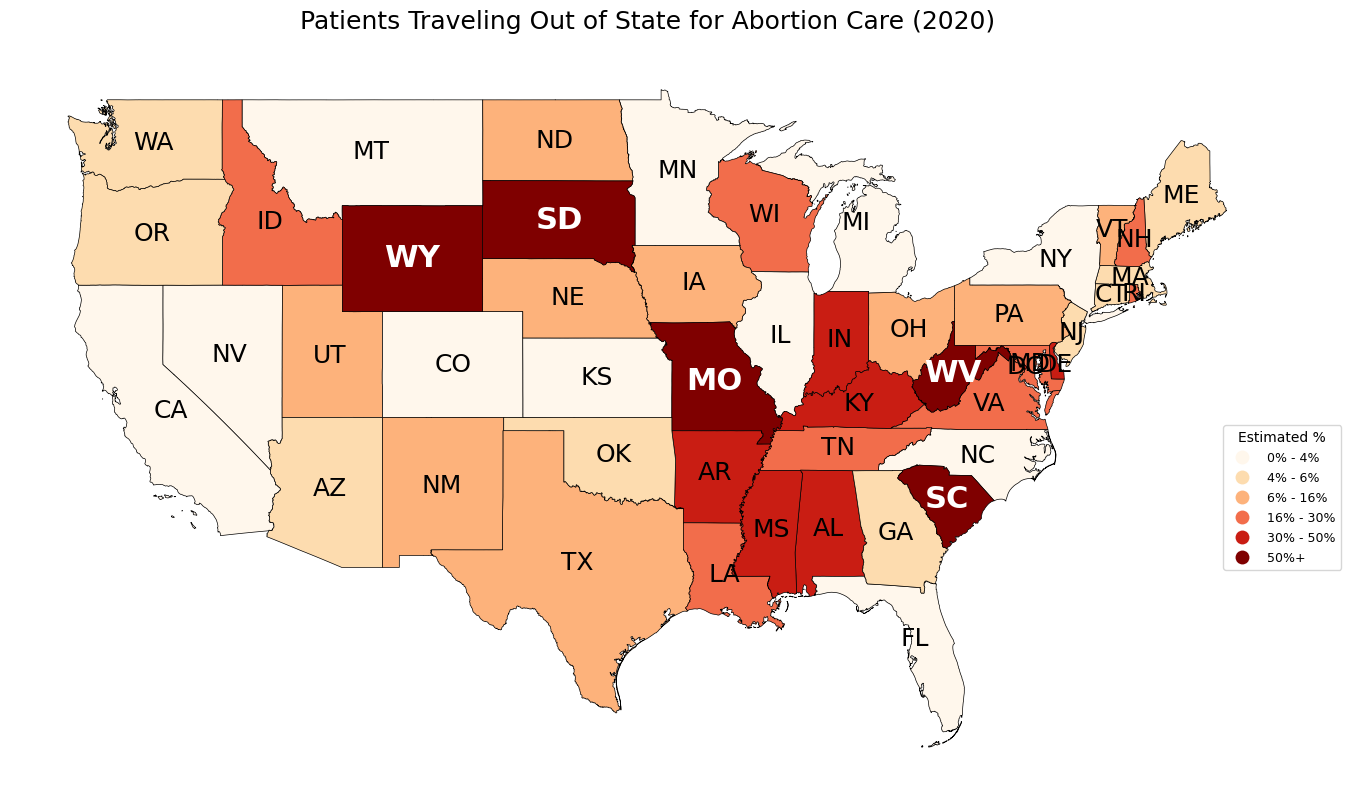

In [39]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Clean & convert column ---
merged['pct_traveled_out_2020'] = pd.to_numeric(
    merged['pct_traveled_out_2020']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '', regex=False),
    errors='coerce'
).round(0)  # ⬅️ round to nearest whole number

# --- 2. Define custom bins and labels ---
bin_edges = [0, 4, 6, 16, 30, 50, 100]  # adjust as needed
bin_labels = ['0% - 4%', '4% - 6%', '6% - 16%', '16% - 30%', '30% - 50%', '50%+']

# --- 3. Cut into categories ---
merged['travel_bin'] = pd.cut(merged['pct_traveled_out_2020'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# --- 4. Plot ---
fig, ax = plt.subplots(figsize=(13.5, 8))
merged.plot(
    column='travel_bin',
    cmap='OrRd',
    categorical=True,
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No data"},
    ax=ax
)

# --- 5. Add state abbreviations (optional) ---
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
  # use the same abbreviation mapping from earlier
merged['abbr'] = merged['state'].map(state_abbr)

# Highlight top 5 states
top5 = merged.nlargest(5, 'pct_traveled_out_2020')

for idx, row in merged.iterrows():
    if pd.isna(row['abbr']) or row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    label = row['abbr']
    if row['state'] in top5['state'].values:
        ax.text(centroid.x, centroid.y, label, fontsize=22, fontweight='bold', ha='center', va='center', color='white')
    else:
        ax.text(centroid.x, centroid.y, label, fontsize=18, ha='center', va='center', color='black')

# --- 6. Final formatting ---
ax.set_title("Patients Traveling Out of State for Abortion Care (2020)", fontsize=18, pad=20)
ax.axis('off')
ax.set_aspect('auto')

leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((1.05, 0.5))
    leg.set_title("Estimated %", prop={'size': 10})
    for t in leg.get_texts():
        t.set_fontsize(9)

plt.tight_layout()
plt.show()

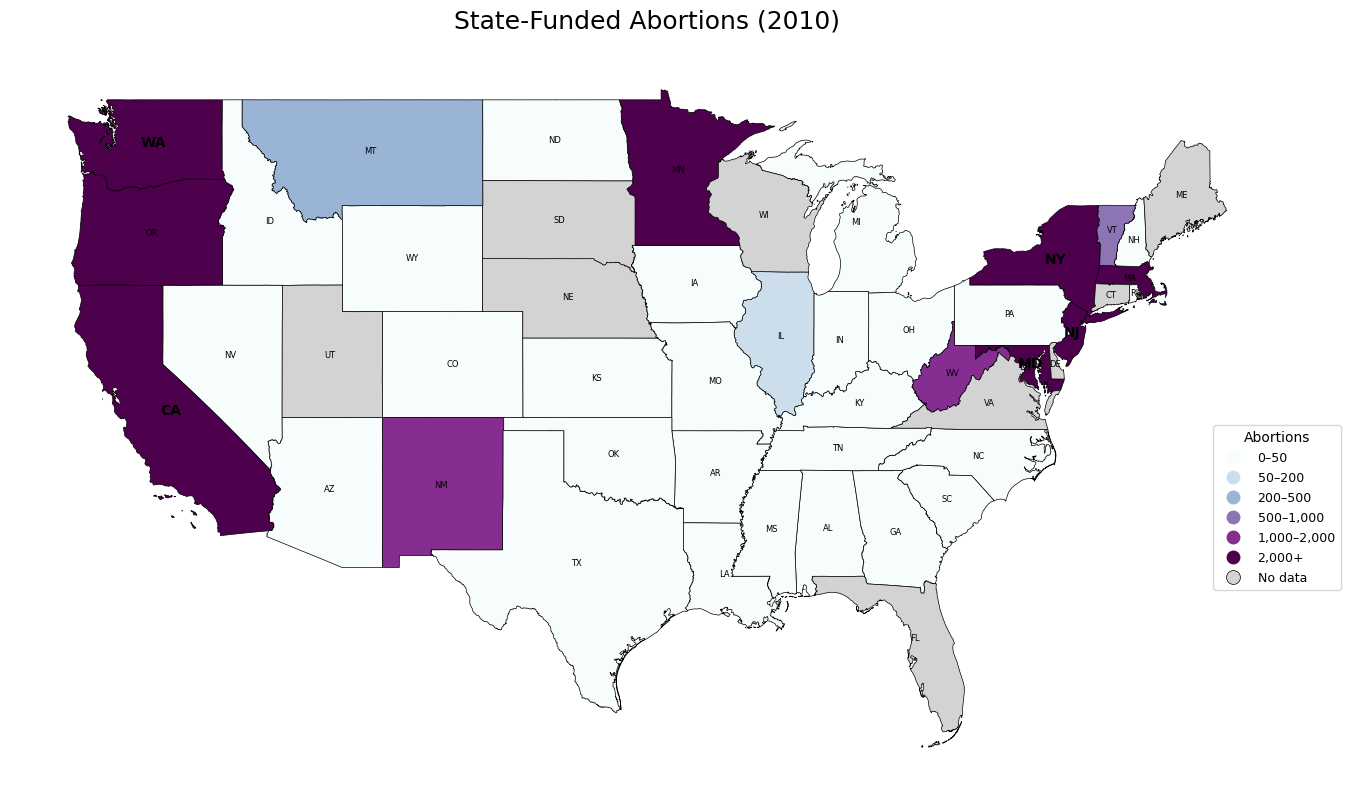

In [24]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Clean column: convert and round ---
merged['state_funded_abortions_2010'] = pd.to_numeric(
    merged['state_funded_abortions_2010']
    .astype(str)
    .str.replace(',', '', regex=False),
    errors='coerce'
).round(0)

# --- 2. Define custom bins and labels ---
bin_edges = [0, 50, 200, 500, 1000, 2000, merged['state_funded_abortions_2010'].max()]
bin_labels = ['0–50', '50–200', '200–500', '500–1,000', '1,000–2,000', '2,000+']

# --- 3. Create binned column ---
merged['funded_bin'] = pd.cut(
    merged['state_funded_abortions_2010'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True
)

# --- 4. Add state abbreviations ---
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
merged['abbr'] = merged['state'].map(state_abbr)

# --- 5. Identify top 5 states by number ---
top5 = merged.nlargest(5, 'state_funded_abortions_2010')

# --- 6. Plot ---
fig, ax = plt.subplots(figsize=(13.5, 8))
merged.plot(
    column='funded_bin',
    cmap='BuPu',  # 👈 new color scheme
    categorical=True,
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No data"},
    ax=ax
)

# --- 7. Add state abbreviations, bold top 5 ---
for idx, row in merged.iterrows():
    if pd.isna(row['abbr']) or row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    if row['state'] in top5['state'].values:
        ax.text(centroid.x, centroid.y, row['abbr'], fontsize=10, fontweight='bold',
                ha='center', va='center', color='black')
    else:
        ax.text(centroid.x, centroid.y, row['abbr'], fontsize=6,
                ha='center', va='center', color='black')

# --- 8. Final formatting ---
ax.set_title("State-Funded Abortions (2010)", fontsize=18, pad=20)
ax.axis('off')
ax.set_aspect('auto')

leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((1.05, 0.5))
    leg.set_title("Abortions", prop={'size': 10})
    for t in leg.get_texts():
        t.set_fontsize(9)

plt.tight_layout()
plt.show()


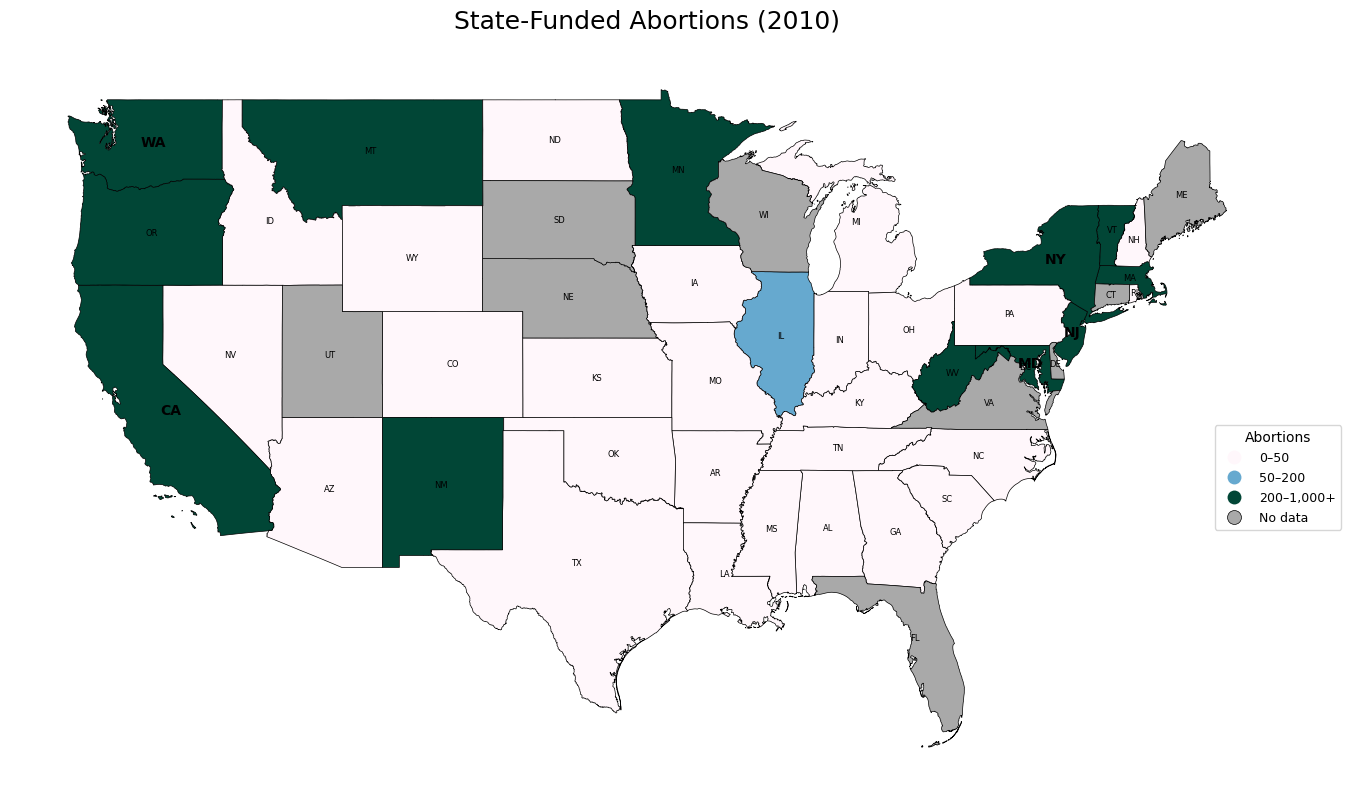

In [32]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Clean the target column ---
merged['state_funded_abortions_2010'] = pd.to_numeric(
    merged['state_funded_abortions_2010']
    .astype(str)
    .str.replace(',', '', regex=False),
    errors='coerce'
).round(0)

# --- 2. Define 3 custom bins and labels ---
bin_edges = [0, 50, 200, merged['state_funded_abortions_2010'].max()]
bin_labels = ['0–50', '50–200', '200–1,000+']

# --- 3. Create binned column ---
merged['funded_bin'] = pd.cut(
    merged['state_funded_abortions_2010'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True
)

# --- 4. Add state abbreviations ---
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
merged['abbr'] = merged['state'].map(state_abbr)

# --- 5. Highlight top 5 states ---
top5 = merged.nlargest(5, 'state_funded_abortions_2010')

# --- 6. Plot ---
fig, ax = plt.subplots(figsize=(13.5, 8))
merged.plot(
    column='funded_bin',
    cmap='PuBuGn',
    categorical=True,
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "darkgrey", "label": "No data"},
    ax=ax
)

# --- 7. Add state abbreviations with top 5 bold ---
for idx, row in merged.iterrows():
    if pd.isna(row['abbr']) or row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(
        centroid.x, centroid.y, row['abbr'],
        fontsize=10 if row['state'] in top5['state'].values else 6,
        fontweight='bold' if row['state'] in top5['state'].values else 'normal',
        ha='center', va='center', color='black'
    )

# --- 8. Final formatting ---
ax.set_title("State-Funded Abortions (2010)", fontsize=18, pad=20)
ax.axis('off')
ax.set_aspect('auto')

# --- 9. Adjust legend ---
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((1.05, 0.5))
    leg.set_title("Abortions", prop={'size': 10})
    for t in leg.get_texts():
        t.set_fontsize(9)

plt.tight_layout()
plt.show()


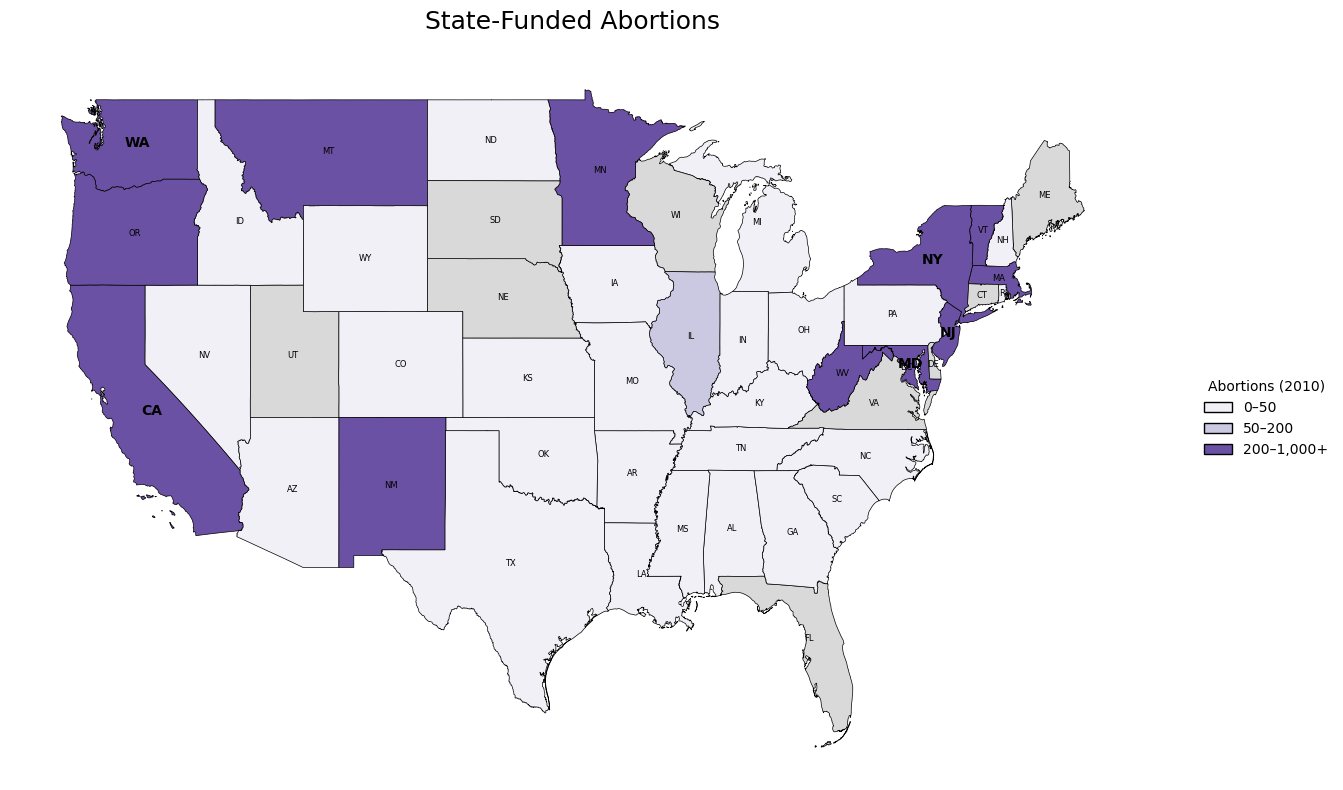

In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# --- 1. Clean the target column ---
merged['state_funded_abortions_2010'] = pd.to_numeric(
    merged['state_funded_abortions_2010']
    .astype(str)
    .str.replace(',', '', regex=False),
    errors='coerce'
).round(0)

# --- 2. Define bins and labels ---
bin_edges = [0, 50, 200, merged['state_funded_abortions_2010'].max()]
bin_labels = ['0–50', '50–200', '200–1,000+']
merged['funded_bin'] = pd.cut(
    merged['state_funded_abortions_2010'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True
)

# --- 3. Assign custom colors to each bin ---
bin_colors = {
    '0–50': '#f2f0f7',       # light purple
    '50–200': '#cbc9e2',     # medium purple
    '200–1,000+': '#6a51a3'  # dark purple
}

# Map bin to color
merged['color'] = merged['funded_bin'].map(bin_colors)

# If it's a categorical column, add the new category before fillna
if isinstance(merged['color'].dtype, pd.CategoricalDtype):
    merged['color'] = merged['color'].cat.add_categories(['#d9d9d9'])

# Fill NaNs with fallback color
merged['color'] = merged['color'].fillna('#d9d9d9')


# --- 4. Add state abbreviations ---
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
merged['abbr'] = merged['state'].map(state_abbr)

# --- 5. Highlight top 5 states ---
top5 = merged.nlargest(5, 'state_funded_abortions_2010')

# --- 6. Plot ---
fig, ax = plt.subplots(figsize=(13.5, 8))
merged.plot(
    color=merged['color'],
    edgecolor='black',
    linewidth=0.5,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

# --- 7. Add labels ---
for idx, row in merged.iterrows():
    if pd.isna(row['abbr']) or row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(
        centroid.x, centroid.y, row['abbr'],
        fontsize=10 if row['state'] in top5['state'].values else 6,
        fontweight='bold' if row['state'] in top5['state'].values else 'normal',
        ha='center', va='center', color='black'
    )

# --- 8. Custom Legend ---
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=bin_colors[label], edgecolor='black', label=label)
    for label in bin_labels
]
ax.legend(
    handles=legend_elements,
    title="Abortions (2010)",
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    frameon=False
)

# --- 9. Final formatting ---
ax.set_title("State-Funded Abortions", fontsize=18, pad=20)
ax.axis('off')
ax.set_aspect('auto')
plt.tight_layout()
plt.show()


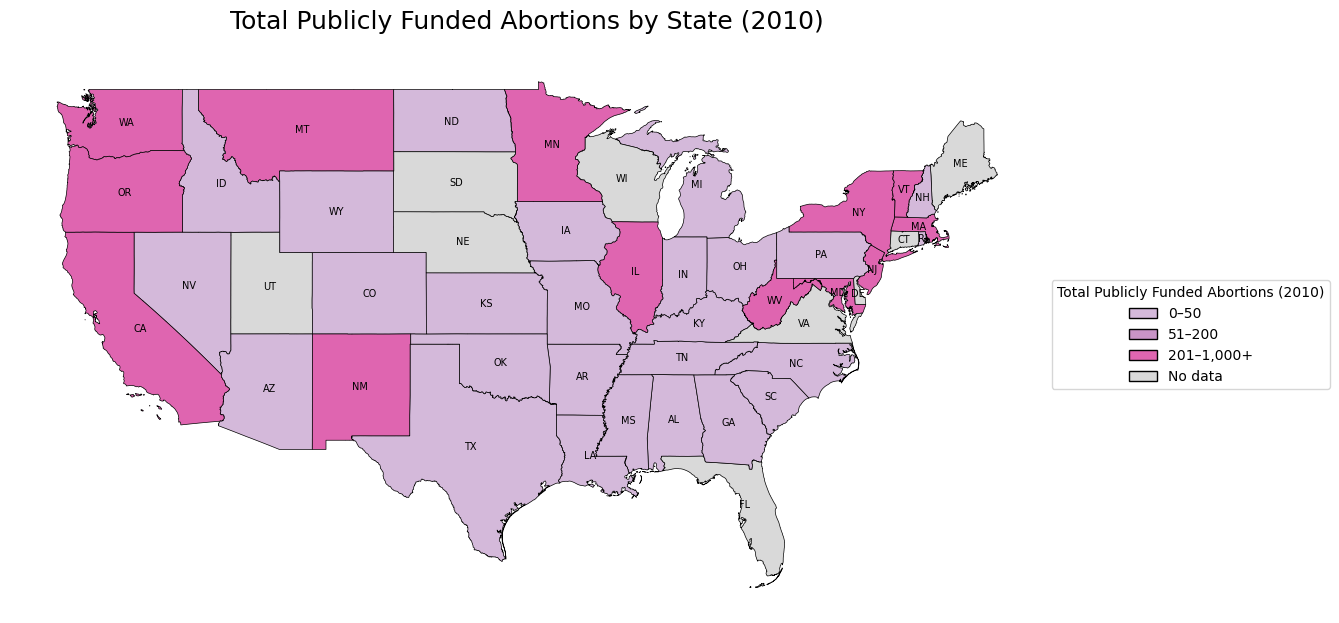

In [38]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# --- 1. Combine both columns into total funded abortions ---
merged['total_funded_abortions_2010'] = (
    pd.to_numeric(merged['fed_funded_abortions_2010'].astype(str).str.replace(',', ''), errors='coerce') +
    pd.to_numeric(merged['state_funded_abortions_2010'].astype(str).str.replace(',', ''), errors='coerce')
)

# --- 2. Define custom bins and labels ---
def categorize_total(val):
    if pd.isna(val):
        return 'No data'
    elif val <= 50:
        return '0–50'
    elif val <= 200:
        return '51–200'
    else:
        return '201–1,000+'

merged['funded_bin'] = merged['total_funded_abortions_2010'].apply(categorize_total)

# --- 3. Assign custom colors ---
bin_colors = {
    '0–50': '#d4b9da',
    '51–200': '#c994c7',
    '201–1,000+': '#df65b0',
    'No data': '#d9d9d9'
}
merged['color'] = merged['funded_bin'].map(bin_colors)

# --- 4. Add state abbreviations (optional) ---
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}
merged['abbr'] = merged['state'].map(state_abbr)

# --- 5. Plot ---
fig, ax = plt.subplots(figsize=(13.5, 8))
merged.plot(
    color=merged['color'],
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# --- 6. Add labels (optional) ---
for idx, row in merged.iterrows():
    if pd.notna(row['abbr']):
        ax.annotate(
            text=row['abbr'],
            xy=row['geometry'].centroid.coords[0],
            ha='center',
            va='center',
            fontsize=7,
            color='black'
        )

# --- 7. Legend ---
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, edgecolor='black', label=label) for label, color in bin_colors.items()]
ax.legend(handles=legend_elements, title="Total Publicly Funded Abortions (2010)", loc='center left', bbox_to_anchor=(1, 0.5))

# --- 8. Final formatting ---
ax.set_title("Total Publicly Funded Abortions by State (2010)", fontsize=18, pad=20)
ax.axis('off')
plt.tight_layout()
plt.show()